# Homwork2 

# 1. Combined Cycle Power Plant Data Set


#### The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.


#### (a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#open xlsx file and load data into df as dataframe
file_name =  'Folds5x2_pp.xlsx'
sheet =  'Sheet1'

import pandas as pd
df = pd.read_excel(io=file_name, sheet_name=sheet)
 

(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [3]:
print('The shape information of this dataset is:')
print(df.shape)

The shape information of this dataset is:
(9568, 5)


From the shape information of the dataset, we can tell that there is 9568 rows and 5 columns.
Each Row represents a set of related data, and every row in this dataset has the same structure or same attribute.

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

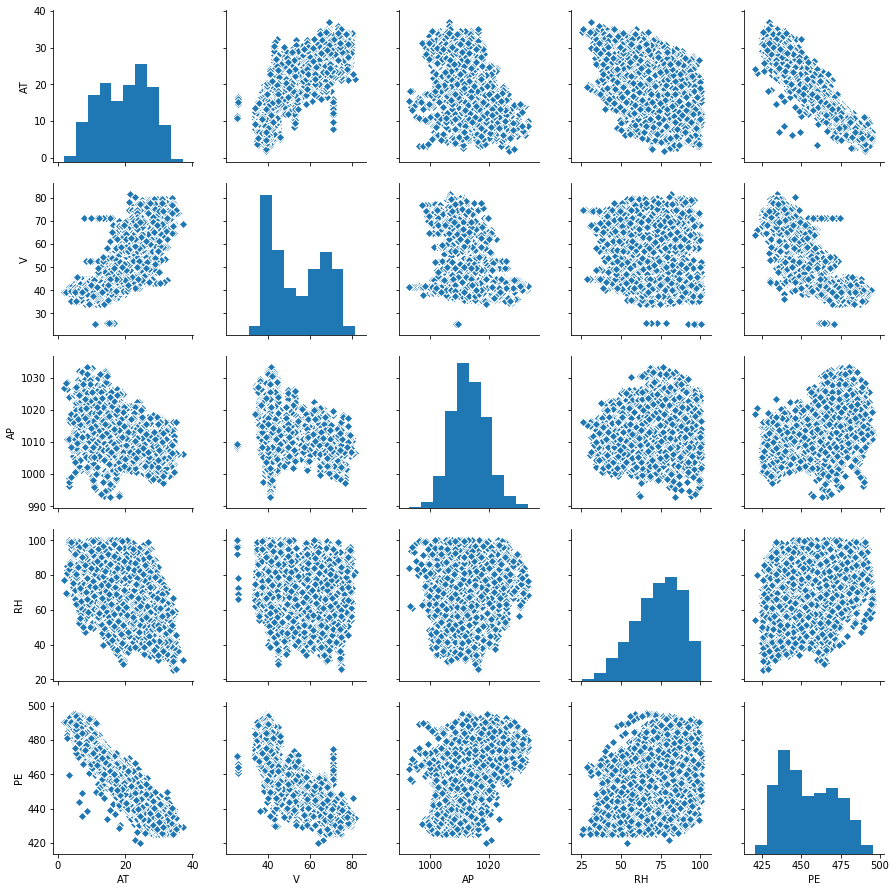

In [4]:
#plot the pairwise scatterplots
sns.pairplot(df, kind="scatter",markers=["D"])
plt.show()

From the pairplot, I can tell that the relationships between AT vs PE and V vs PE are more likely to be linear. And in the plots of AP vs PE and RH vs PE, there could be some noise data because there are some data points seem to be outliers. There could also be some relationships between variables like V and AP.

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [39]:
import sys
from astropy.table import Table

d3_keys = ['AT', 'V', 'AP', 'RH','PE']
d3_means = list()
d3_median = list()
d3_range = list()
d3_quantile1 = list()
d3_quantile3 = list()
d3_IQR = list()

#calculate the means
mean_AT = round(df['AT'].mean(),2)
d3_means.append(mean_AT)
mean_V = round(df['V'].mean(),2)
d3_means.append(mean_V)
mean_AP = round(df['AP'].mean(),2)
d3_means.append(mean_AP)
mean_RH = round(df['RH'].mean(),2)
d3_means.append(mean_RH)
mean_PE = round(df['PE'].mean(),2)
d3_means.append(mean_PE)

#calculate the medians
median_AT = round(df['AT'].median(),2)
d3_median.append(median_AT)
median_V = round(df['V'].median(),2)
d3_median.append(median_V)
median_AP = round(df['AP'].median(),2)
d3_median.append(median_AP)
median_RH = round(df['RH'].median(),2)
d3_median.append(median_RH)
median_PE = round(df['PE'].median(),2)
d3_median.append(median_PE)

#calculate the ranges
range_AT = round((df['AT'].max() - df['AT'].min()),2)
d3_range.append(range_AT)
range_V = round((df['V'].max() - df['V'].min()),2)
d3_range.append(range_V)
range_AP = round((df['AP'].max() - df['AP'].min()),2)
d3_range.append(range_AP)
range_RH = round((df['RH'].max() - df['RH'].min()),2)
d3_range.append(range_RH)
range_PE = round((df['PE'].max() - df['PE'].min()),2)
d3_range.append(range_PE)

#calculate the first quartiles
quantile1_AT = round(df['AT'].quantile(.25),2)
d3_quantile1.append(quantile1_AT)
quantile1_V = round(df['V'].quantile(.25),2)
d3_quantile1.append(quantile1_V)
quantile1_AP = round(df['AP'].quantile(.25),2)
d3_quantile1.append(quantile1_AP)
quantile1_RH = round(df['RH'].quantile(.25),2)
d3_quantile1.append(quantile1_RH)
quantile1_PE = round(df['PE'].quantile(.25),2)
d3_quantile1.append(quantile1_PE)

#calculate the third quartiles
quantile3_AT = round(df['AT'].quantile(.75),2)
d3_quantile3.append(quantile3_AT)
quantile3_V = round(df['V'].quantile(.75),2)
d3_quantile3.append(quantile3_V)
quantile3_AP = round(df['AP'].quantile(.75),2)
d3_quantile3.append(quantile3_AP)
quantile3_RH = round(df['RH'].quantile(.75),2)
d3_quantile3.append(quantile3_RH)
quantile3_PE = round(df['PE'].quantile(.75),2)
d3_quantile3.append(quantile3_PE)

#calculate the interquartile ranges
IQR_AT = round((quantile3_AT - quantile1_AT),2)
d3_IQR.append(IQR_AT)
IQR_V = round((quantile3_V - quantile1_V),2)
d3_IQR.append(IQR_V)
IQR_AP = round((quantile3_AP - quantile1_AP),2)
d3_IQR.append(IQR_AP)
IQR_RH = round((quantile3_RH - quantile1_RH),2)
d3_IQR.append(IQR_RH)
IQR_PE = round((quantile3_PE - quantile1_PE),2)
d3_IQR.append(IQR_PE)

#show in a table
t = Table([d3_keys,d3_means,d3_median,d3_range,d3_quantile1,d3_quantile3,d3_IQR],names = ('variables','mean','median','range','firt quantile','third quantile','IQR'))
print(t)


variables   mean   median range firt quantile third quantile  IQR 
--------- ------- ------- ----- ------------- -------------- -----
       AT   19.65   20.34  35.3         13.51          25.72 12.21
        V   54.31   52.08  56.2         41.74          66.54  24.8
       AP 1013.26 1012.94 40.41        1009.1        1017.26  8.16
       RH   73.31   74.97  74.6         63.33          84.83  21.5
       PE  454.37  451.55  75.5        439.75         468.43 28.68


#### (c) For each predictor, fit a simple linear regression model to predict the response.
#### Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

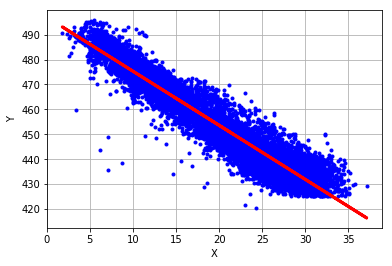

Coefficients: 
 [[-2.17131996]]
Intercept: 
 [497.03411989]
The outliers are:
[]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 5.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:51:15   Log-Likelihood:                -63065.
No. Observations:                9568   AIC:                         1.261e+05
Df Residuals:                    9567   BIC:                         1.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [40]:
#AT vs PE
import statsmodels.api as sm 
from scipy import stats
from sklearn import datasets, linear_model
#select the train dataset
c1_train_xAT = df[['AT']]
c1_train_yPE = df[['PE']]

#choose linear model and train the model 
regr_c1_AT = linear_model.LinearRegression(normalize = True)
regr_c1_AT.fit(c1_train_xAT , c1_train_yPE)
c1_AT_pred = regr_c1_AT.predict(c1_train_xAT)

#plot 
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(c1_train_xAT,c1_train_yPE,'b.') 
plt.plot(c1_train_xAT, c1_AT_pred, color='red', linewidth=3)
plt.show()

#store the coefficients and the intercept
coe_list = list()
coe_list.append(list(regr_c1_AT.coef_[0])[0])

print('Coefficients: \n', regr_c1_AT.coef_)
print('Intercept: \n', regr_c1_AT.intercept_)

# calculate the outlier cutoff
cut_off = IQR_AT*1.5
lower, upper = quantile1_AT - cut_off, quantile3_AT + cut_off
# identify outliers
c1_train_ATPE_list = c1_train_xAT['AT'].values.tolist()
outlier_AT = [x for x in c1_train_ATPE_list if x < lower or x > upper]
print('The outliers are:')
print(outlier_AT)

#print summary
d_sm_c1 = sm.OLS(c1_train_yPE,c1_train_xAT)
d_sm_fit_c1 = d_sm_c1.fit()
print(d_sm_fit_c1.summary())

#### From the results and plot, we can tell that there is a statistically significant association between the AT and the PE. Because the p-value of AT is 0.000. And from the plot, we can tell that the relationship between AT and PE is likely to be linear. What's more, there is no outliers (datas out of 1.5*IQR).

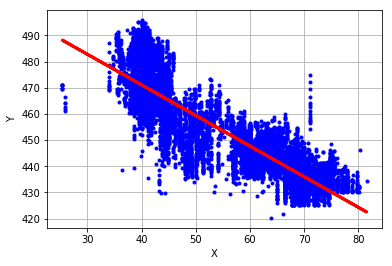

Coefficients: 
 [[-1.16813513]]
Intercept: 
 [517.80152631]
The outliers are:
[]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.318e+05
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:45:30   Log-Likelihood:                -59245.
No. Observations:                9568   AIC:                         1.185e+05
Df Residuals:                    9567   BIC:                         1.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [11]:
#V vs PE
from sklearn import datasets, linear_model

c1_train_xV = df[['V']]
c1_train_yPE = df[['PE']]

regr_c1_V = linear_model.LinearRegression(normalize = True)
regr_c1_V.fit(c1_train_xV , c1_train_yPE)
c1_V_pred = regr_c1_V.predict(c1_train_xV)

#plot
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) # show grid
plt.plot(c1_train_xV,c1_train_yPE,'b.') # plot
plt.plot(c1_train_xV, c1_V_pred, color='red', linewidth=3) # plot
plt.show() # show image

#plt.show()
coe_list.append(list(regr_c1_V.coef_[0])[0])
print('Coefficients: \n', regr_c1_V.coef_)
print('Intercept: \n', regr_c1_V.intercept_)

# calculate the outlier cutoff
cut_off = IQR_V*1.5
lower, upper = quantile1_V - cut_off, quantile3_V + cut_off

# identify outliers
c1_train_VPE_list = c1_train_xV['V'].values.tolist()
outlier_V = [x for x in c1_train_VPE_list if x < lower or x > upper]
print('The outliers are:')
print(outlier_V)

#print summary
d_sm_c2 = sm.OLS(c1_train_yPE,c1_train_xV)
d_sm_fit_c2 = d_sm_c2.fit()
print(d_sm_fit_c2.summary())

#### From the results and plot, we can tell that there is a statistically significant association between the V and the PE. Because the p-value of V is 0.000. And from the plot, we can tell that the relationship between V and PE is likely to be linear. What's more, there is no outliers (datas out of 1.5*IQR).

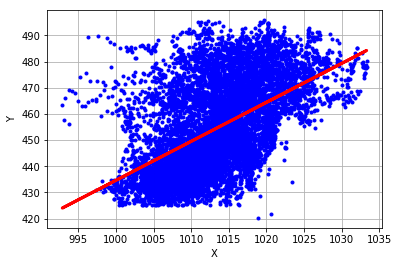

Coefficients: 
 [[1.48987167]]
Intercept: 
 [-1055.26098898]
The outliers are:
[1030.46, 1033.25, 1030.18, 1031.1, 1029.65, 1029.8, 1033.04, 1033.3, 1032.67, 1033.08, 994.17, 995.88, 995.24, 1031.55, 996.32, 1029.6, 1030.3, 1031.5, 1030.94, 996.55, 1030.83, 1031.96, 996.35, 1031.01, 1030.77, 1032.98, 1032.93, 1031.33, 996.03, 1030.86, 1030.72, 1033.19, 1031.96, 1030.42, 1032.86, 1032.77, 1029.63, 1033.09, 1030.82, 1029.99, 1031.8, 1032.08, 993.31, 1033.14, 1029.54, 1032.88, 1029.7, 1030.81, 1030.0, 995.45, 1030.2, 1032.72, 1031.45, 1032.14, 1029.91, 995.02, 1031.14, 993.82, 1032.83, 1032.37, 1032.16, 1031.16, 1030.72, 1029.9, 994.6, 1030.1, 1029.61, 993.74, 1031.39, 1031.2, 1031.27, 1030.38, 1031.97, 1033.29, 1031.58, 1031.08, 993.11, 1031.75, 1029.54, 1029.7, 1031.21, 1031.34, 1030.68, 992.89, 1031.71, 1031.21, 1031.32, 1030.61]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.999


In [12]:
#AP vs PE
from sklearn import datasets, linear_model

c1_train_xAP = df[['AP']]
c1_train_yPE = df[['PE']]

regr_c1_AP = linear_model.LinearRegression(normalize = True)
regr_c1_AP.fit(c1_train_xAP , c1_train_yPE)
c1_AP_pred = regr_c1_AP.predict(c1_train_xAP)

#plot
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(c1_train_xAP,c1_train_yPE,'b.')
plt.plot(c1_train_xAP, c1_AP_pred, color='red', linewidth=3) 
plt.show() 

#print coefficients and intercept
coe_list.append(list(regr_c1_AP.coef_[0])[0])
print('Coefficients: \n', regr_c1_AP.coef_)
print('Intercept: \n', regr_c1_AP.intercept_)
# calculate the outlier cutoff
cut_off_AP = IQR_AP*1.5
lower, upper = quantile1_AP - cut_off_AP, quantile3_AP + cut_off_AP
# identify outliers
c1_train_APPE_list = c1_train_xAP['AP'].values.tolist()
outlier_AP = [x for x in c1_train_APPE_list if x < lower or x > upper]
print('The outliers are:')
print(outlier_AP)

#print summary
d_sm_c3 = sm.OLS(c1_train_yPE,c1_train_xAP)
d_sm_fit_c3 = d_sm_c3.fit()
print(d_sm_fit_c3.summary())

#### From the results and plot, we can tell that there is a statistically significant association between the AP and the PE. Because the p-value of AP is 0.000. And from the plot, we can tell that the relationship between AP and PE is likely to be linear. What's more, there are some outliers (datas out of 1.5*IQR).

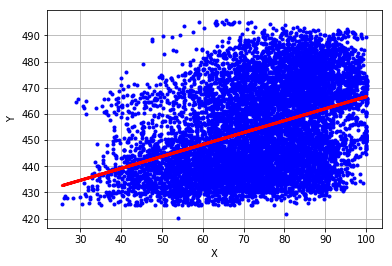

Coefficients: 
 [[0.4556501]]
Intercept: 
 [420.96176616]
The outliers are:
[25.89, 28.16, 29.43, 26.67, 29.86, 30.59, 25.56, 30.83, 28.81, 26.3, 30.34, 30.99]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.727e+05
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:47:46   Log-Likelihood:                -55937.
No. Observations:                9568   AIC:                         1.119e+05
Df Residuals:                    9567   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [13]:
#RH vs PE
from sklearn import datasets, linear_model

c1_train_xRH = df[['RH']]
c1_train_yPE = df[['PE']]

regr_c1_RH = linear_model.LinearRegression(normalize = True)
regr_c1_RH.fit(c1_train_xRH , c1_train_yPE)
c1_RH_pred = regr_c1_RH.predict(c1_train_xRH)

plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(c1_train_xRH,c1_train_yPE,'b.') 
plt.plot(c1_train_xRH, c1_RH_pred, color='red', linewidth=3) 
plt.show() 

coe_list.append(list(regr_c1_RH.coef_[0])[0])
print('Coefficients: \n', regr_c1_RH.coef_)
print('Intercept: \n', regr_c1_RH.intercept_)

# calculate the outlier cutoff
cut_off_RH = IQR_RH*1.5
lower, upper = quantile1_RH - cut_off_RH, quantile3_RH + cut_off_RH
# identify outliers
c1_train_RHPE_list = c1_train_xRH['RH'].values.tolist()
outlier_RH = [x for x in c1_train_RHPE_list if x < lower or x > upper]
print('The outliers are:')
print(outlier_RH)

#print summary
d_sm_c4 = sm.OLS(c1_train_yPE,c1_train_xRH)
d_sm_fit_c4 = d_sm_c4.fit()
print(d_sm_fit_c4.summary())

#### From the results and plot, we can tell that there is a statistically significant association between the RH and the PE. Because the p-value of RH is 0.000. And from the plot, we can tell that the relationship between RH and PE is likely to be linear. What's more, there are some outliers (datas out of 1.5*IQR).

#### (d) Fit a multiple regression model to predict the response using all of the predictors.
#### Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

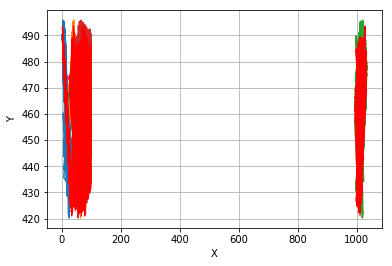

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:51:30   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [41]:
import statsmodels.api as sm 
from scipy import stats
d_train_x = df[['AT','V','AP','RH']]
d_train_yPE = df[['PE']]
X = sm.add_constant(d_train_x)
regr_d = linear_model.LinearRegression(normalize = True)
regr_d.fit(d_train_x , d_train_yPE)
d_pred = regr_d.predict(d_train_x)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.plot(d_train_x,d_train_yPE) 
plt.plot(d_train_x, d_pred, color='red', linewidth=1) 
plt.show() 

d_sm = sm.OLS(d_train_yPE,X)
d_sm_fit = d_sm.fit()
print(d_sm_fit.summary())
coe_d = regr_d.coef_

#### From the plot and summary table, we can see that every predictor can reject the null hypothesis, because the p-value of all predictors are 0.

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

[-2.1713199585177936, -1.1681351265557136, 1.489871673399114, 0.45565010226298014]
[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


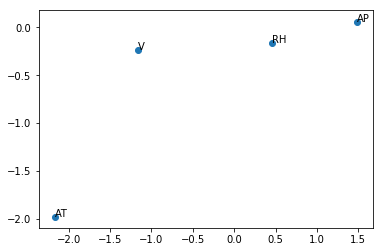

In [11]:
print(coe_list)
print(coe_d[0])
plt.scatter(coe_list,coe_d[0])
variablelabel = ['AT','V','AP','RH']
for i, txt in enumerate(variablelabel):
    plt.annotate(txt, (coe_list[i], (coe_d[0])[i]))
plt.show()

#### (f) Is there evidence of nonlinear association between any of the predictors and the response? 
#### To answer this question, for each predictor X, fit a model of the form
#### Y = β0 + β1X + β2X^2+ β3x^3 + &

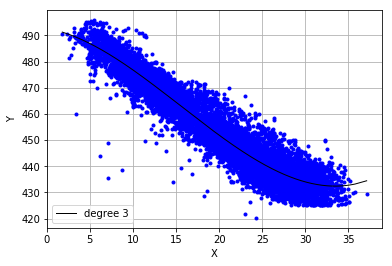

The score of Polynomial Regression is:
0.9118826626967005
And the score of Linear Regression is:
0.8989475964148236
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:02:26   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [13]:
#Polynomial Regression on AT
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
# create a Linear Regressor   
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(3)

# convert to be used further to linear regression
model_f_AT = make_pipeline(PolynomialFeatures(3), Ridge())
X_transform = poly.fit_transform(c1_train_xAT)
#print(X_transform)
# fit this to Linear Regressor
model_f_AT.fit(c1_train_xAT,c1_train_yPE) 
#print(c1_train_xAT.sort_values(by = 'AT'))
# get the predictions
y_preds_f_AT = model_f_AT.predict(c1_train_xAT.sort_values(by = 'AT'))

#plot
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(c1_train_xAT,c1_train_yPE,'b.') 
plt.plot(c1_train_xAT.sort_values(by = 'AT'), y_preds_f_AT, color='black', linewidth=1,label="degree 3")
#plt.scatter(c1_train_xAT,c1_AT_pred,color='black')
plt.legend(loc='lower left')
plt.show() 

print('The score of Polynomial Regression is:')
print(model_f_AT.score(c1_train_xAT,c1_train_yPE))
print('And the score of Linear Regression is:')
print(regr_c1_AT.score(c1_train_xAT , c1_train_yPE))

d_sm_fATPE = sm.OLS(c1_train_yPE,X_transform)
d_sm_fit_fATPE = d_sm_fATPE.fit()
print(d_sm_fit_fATPE.summary())


#### There is nonlinear association between AT and the PE. Because the score of polynomial regression is higher.

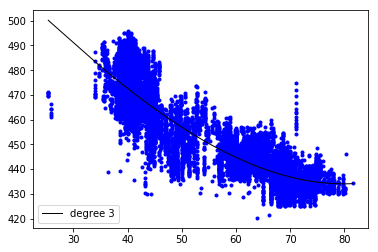

The score of Polynomial Regression is:
0.7750219710935816
And the score of Linear Regression is:
0.7565177870683979
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:07:52   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [21]:
#Polynomial Regression on V(using pipeline )
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
# create a Linear Regressor   
lin_regressor = LinearRegression()
poly = PolynomialFeatures(3)
X_transform_f_V = poly.fit_transform(c1_train_xV)
#convert to be used further to linear regression
model_f_V = make_pipeline(PolynomialFeatures(3), Ridge())
model_f_V.fit(c1_train_xV,c1_train_yPE) 
y_preds_f_V = model_f_V.predict(c1_train_xV.sort_values(by = 'V'))

plt.plot(c1_train_xV,c1_train_yPE,'b.') 
plt.plot(c1_train_xV.sort_values(by = 'V'), y_preds_f_V, color='black', linewidth=1,label="degree 3")
#plt.scatter(c1_train_xAT,c1_AT_pred,color='black') 
plt.legend(loc='lower left')
plt.show() 

print('The score of Polynomial Regression is:')
print(model_f_V.score(c1_train_xV,c1_train_yPE))
print('And the score of Linear Regression is:')
print(regr_c1_V.score(c1_train_xV , c1_train_yPE))


d_sm_fVPE = sm.OLS(c1_train_yPE,X_transform_f_V)
d_sm_fit_fVPE = d_sm_fVPE.fit()
print(d_sm_fit_fVPE.summary())

#### There is nonlinear association between V and the PE. Because the score of polynomial regression is higher.

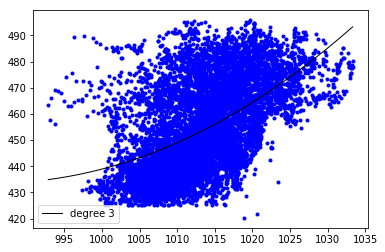

The score of Polynomial Regression is:
0.2749493844083879
And the score of Linear Regression is:
0.2687686564110674
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:52:02   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [42]:
#Polynomial Regression on AP(using pipeline )
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
# create a Linear Regressor   
poly = PolynomialFeatures(3)
lin_regressor = LinearRegression()
X_transform_f_AP = poly.fit_transform(c1_train_xAP)

#convert to be used further to linear regression
model_f_AP = make_pipeline(PolynomialFeatures(3), Ridge())
model_f_AP.fit(c1_train_xAP,c1_train_yPE) 
y_preds_f_AP = model_f_AP.predict(c1_train_xAP.sort_values(by = 'AP'))

plt.plot(c1_train_xAP,c1_train_yPE,'b.') 
plt.plot(c1_train_xAP.sort_values(by = 'AP'), y_preds_f_AP, color='black', linewidth=1,label="degree 3")
plt.legend(loc='lower left')
plt.show() 

print('The score of Polynomial Regression is:')
print(model_f_AP.score(c1_train_xAP,c1_train_yPE))
print('And the score of Linear Regression is:')
print(regr_c1_AP.score(c1_train_xAP , c1_train_yPE))


d_sm_fAP = sm.OLS(c1_train_yPE,X_transform_f_AP)
d_sm_fit_fAP = d_sm_fAP.fit()
print(d_sm_fit_fAP.summary())

#### There is nonlinear association between AP and the PE. Because the score of polynomial regression is higher.

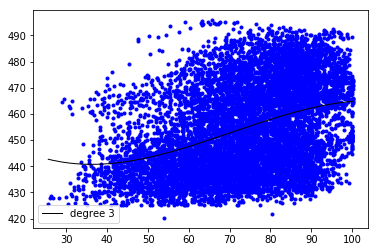

The score of Polynomial Regression is:
0.15374253441628605
And the score of Linear Regression is:
0.15193944023117567
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:09:32   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [24]:
#Polynomial Regression on RH(using pipeline )
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
# create a Linear Regressor   
lin_regressor = LinearRegression()
X_transform_f_RH = poly.fit_transform(c1_train_xRH)
#convert to be used further to linear regression
model_f_RH = make_pipeline(PolynomialFeatures(3), Ridge())
model_f_RH.fit(c1_train_xRH,c1_train_yPE) 
y_preds_f_RH = model_f_RH.predict(c1_train_xRH.sort_values(by = 'RH'))

plt.plot(c1_train_xRH,c1_train_yPE,'b.')
plt.plot(c1_train_xRH.sort_values(by = 'RH'), y_preds_f_RH, color='black', linewidth=1,label="degree 3")
plt.legend(loc='lower left')
plt.show() 

print('The score of Polynomial Regression is:')
print(model_f_RH.score(c1_train_xRH,c1_train_yPE))
print('And the score of Linear Regression is:')
print(regr_c1_RH.score(c1_train_xRH , c1_train_yPE))

d_sm_fRH = sm.OLS(c1_train_yPE,X_transform_f_RH)
d_sm_fit_fRH = d_sm_fRH.fit()
print(d_sm_fit_fRH.summary())

#### There is nonlinear association between RH and the PE. Because the score of polynomial regression is higher.

#### (g) Is there evidence of association of interactions of predictors with the response? 
#### To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [25]:
#interaction on ['1', 'x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3'](using linear regression)
lin_regressor = LinearRegression() 
poly_g = PolynomialFeatures(degree = 2,interaction_only = True)
g_train_x_ALL = df[['AT','V','AP','RH']]
X_transform_g = poly_g.fit_transform(g_train_x_ALL)

print(poly_g.get_feature_names())  

d_sm_g = sm.OLS(c1_train_yPE,X_transform_g)
d_sm_fit_g = d_sm_g.fit()
print(d_sm_fit_g.summary())

['1', 'x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:19:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

#### Not all interactions are significant, however, there are some interactions' p-values are extramely small.

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [26]:
#lin_regressor = LinearRegression() 
from sklearn.metrics import mean_squared_error
#shuffle
df_train_i = df.sample(frac=0.7)
df_test_i = df.loc[df.index.difference(df_train_i.index)]
df_train_iX = df_train_i[['AT','V','AP','RH']]
df_train_iY = df_train_i[['PE']]
df_test_iX = df_test_i[['AT','V','AP','RH']]
df_test_iY = df_test_i[['PE']]

#transform
poly_h = PolynomialFeatures(degree = 2)
h_train_x_ALL = df[['AT','V','AP','RH']]
X_transform_h_train = poly_h.fit_transform(df_train_iX)
X_transform_h_test = poly_h.fit_transform(df_test_iX)
print(poly_h.get_feature_names()) 


#MSE
lin_h1 = linear_model.LinearRegression()
lin_h1.fit(X_transform_h_train, df_train_iY)
pred_h1_train = lin_h1.predict(X_transform_h_train)
pred_h1_test = lin_h1.predict(X_transform_h_test)
print("Train Mean squared error: %.2f"
      % mean_squared_error(df_train_iY, pred_h1_train))
print("Test Mean squared error: %.2f"
      % mean_squared_error(df_test_iY, pred_h1_test))

#summary
d_sm_h = sm.OLS(df_train_iY,X_transform_h_train)
d_sm_fit_h = d_sm_h.fit()
print(d_sm_fit_h.summary())


['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
Train Mean squared error: 18.17
Test Mean squared error: 17.98
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7194.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:20:15   Log-Likelihood:                -19216.
No. Observations:                6698   AIC:                         3.846e+04
Df Residuals:                    6683   BIC:                         3.856e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std er

In [28]:
#remove x0*x2
X_transform_h_train1 = np.delete(X_transform_h_train, 7, axis =1)
X_transform_h_test1 = np.delete(X_transform_h_test, 7, axis =1)
d_sm_h1 = sm.OLS(df_train_iY,X_transform_h_train1)
d_sm_fit_h1 = d_sm_h1.fit()
print(d_sm_fit_h1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7748.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:21:44   Log-Likelihood:                -19216.
No. Observations:                6698   AIC:                         3.846e+04
Df Residuals:                    6684   BIC:                         3.856e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9568.4943   1280.261     -7.474      0.0

In [29]:
#remove x1*x3
X_transform_h_train2 = np.delete(X_transform_h_train1, 10, axis =1)
X_transform_h_test2 = np.delete(X_transform_h_test1, 10, axis =1)
d_sm_h2 = sm.OLS(df_train_iY,X_transform_h_train2)
d_sm_fit_h2 = d_sm_h2.fit()
print(d_sm_fit_h2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8394.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:22:15   Log-Likelihood:                -19217.
No. Observations:                6698   AIC:                         3.846e+04
Df Residuals:                    6685   BIC:                         3.855e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9625.8796   1278.798     -7.527      0.0

In [30]:
#remove x1*x2
X_transform_h_train3 = np.delete(X_transform_h_train2, 8, axis =1)
X_transform_h_test3 = np.delete(X_transform_h_test2, 8, axis =1)
d_sm_h3 = sm.OLS(df_train_iY,X_transform_h_train3)
d_sm_fit_h3 = d_sm_h3.fit()
print(d_sm_fit_h3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9157.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:23:03   Log-Likelihood:                -19217.
No. Observations:                6698   AIC:                         3.846e+04
Df Residuals:                    6686   BIC:                         3.854e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9710.6453   1275.659     -7.612      0.0

In [31]:
lin_h3 = linear_model.LinearRegression()
lin_h3.fit(X_transform_h_train3, df_train_iY)
pred_h3_train = lin_h3.predict(X_transform_h_train3)
pred_h3_test = lin_h3.predict(X_transform_h_test3)


lin_model1 = linear_model.LinearRegression()
lin_model1.fit(df_train_iX,df_train_iY)
pre_model1_train = lin_model1.predict(df_train_iX)
pre_model1_test = lin_model1.predict(df_test_iX)

print('The MSE of model1(all predictors:)')
print("Train Mean squared error: %.7f"
      % mean_squared_error(df_train_iY, pre_model1_train))
print("Test Mean squared error: %.7f"
      % mean_squared_error(df_test_iY, pre_model1_test))
print('The MSE of model2 (contains all possible interaction terms and quadratic nonlinearities )')
print("Train Mean squared error: %.7f"
      % mean_squared_error(df_train_iY, pred_h1_train))
print("Test Mean squared error: %.7f"
      % mean_squared_error(df_test_iY, pred_h1_test))
print('The MSE of model3(remove insignificant terms:)')
print("Train Mean squared error: %.7f"
      % mean_squared_error(df_train_iY, pred_h3_train))
print("Test Mean squared error: %.7f"
      % mean_squared_error(df_test_iY, pred_h3_test))

The MSE of model1(all predictors:)
Train Mean squared error: 20.8549842
Test Mean squared error: 20.5819723
The MSE of model2 (contains all possible interaction terms and quadratic nonlinearities )
Train Mean squared error: 18.1729046
Test Mean squared error: 17.9844345
The MSE of model3(remove insignificant terms:)
Train Mean squared error: 18.1790786
Test Mean squared error: 17.9971819


#### (i) KNN Regression:
#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k

The best key is :
6


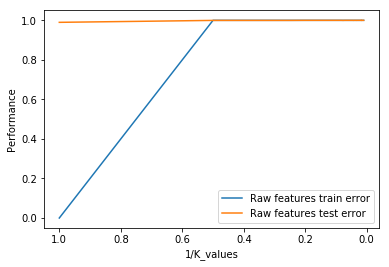

In [32]:
#Use raw data to train knn model
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
df_train_i = df.sample(frac=0.7)
df_test_i = df.loc[df.index.difference(df_train_i.index)]

#select random train and test data
df_train_iX = df_train_i[['AT','V','AP','RH']]
df_train_iY = df_train_i[['PE']]
df_test_iX = df_test_i[['AT','V','AP','RH']]
df_test_iY = df_test_i[['PE']]
df_test_iY_list = df_test_iY['PE'].tolist()
df_train_iY_list = df_train_iY['PE'].tolist()


k_list = list()
k_i_trainerror = list()
k_i_trainerror_nor = list()
k_i_testerror = list()
k_i_testerror_nor = list()
K_performance = {}
for k in range(1,101,1):
    #train knn model
    k_list.append(1/k)
    knn_i = KNeighborsRegressor(n_neighbors=k)
    knn_i.fit(df_train_iX, np.ravel(df_train_iY))
    knn_i_testpred = knn_i.predict(df_test_iX)
    knn_i_trainpred = knn_i.predict(df_train_iX)
    K_performance.update({k:knn_i.score(df_test_iX, df_test_iY)})
    sum_testerror = 0
    for j in range (0,len(df_test_iY_list),1):
        if knn_i_testpred[j] != df_test_iY_list[j]:
            sum_testerror = sum_testerror+1
            #cal the test errors
    k_i_testerror.append(sum_testerror/len(df_test_iY_list))
    
    sum_trainerror = 0
    for m in range (0,len(df_train_iY_list),1):
        #cal the train errors
        if knn_i_trainpred[j] != df_train_iY_list[j]:
            sum_trainerror = sum_trainerror+1
    
    k_i_trainerror.append(sum_trainerror/len(df_train_iY_list))
    

#print the best key by cal the best score
key_best = max(K_performance.keys(), key=(lambda m: K_performance[m]))
print('The best key is :')
print(key_best)

plt.plot(k_list, k_i_trainerror, label='Raw features train error')
plt.gca().invert_xaxis()
plt.plot(k_list, k_i_testerror, label='Raw features test error')
plt.legend(loc='lower right')
plt.xlabel('1/K_values')
plt.ylabel('Performance')

plt.show()
#print(k_i_testerror)

The best key is :
12


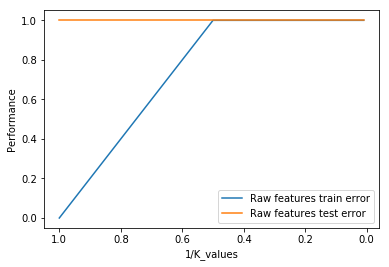

In [34]:
#Use normalize data to train knn model
df_train_iX = df_train_i[['AT','V','AP','RH']]
df_train_iY = df_train_i[['PE']]
df_test_iX = df_test_i[['AT','V','AP','RH']]
df_test_iY = df_test_i[['PE']]


df_train_iX_nor = preprocessing.normalize(df_train_iX, norm='l2')
df_test_iX_nor = preprocessing.normalize(df_test_iX, norm='l2')

df_train_iY_nor=(df_train_iY-df_train_iY.mean())/df_train_iY.std()
df_test_iY_nor=(df_test_iY-df_test_iY.mean())/df_test_iY.std()

df_test_iY_nor_list = df_test_iY_nor['PE'].tolist()
df_train_iY_nor_list = df_train_iY_nor['PE'].tolist()

k_list = list()
k_i_trainerror_nor = list()
k_i_testerror_nor = list()
K_performance_nor = {}
for k in range(1,101,1):
    k_list.append(1/k)
    knn_i_nor = KNeighborsRegressor(n_neighbors=k)
    knn_i_nor.fit(df_train_iX_nor, np.ravel(df_train_iY_nor))
    knn_i_testpred_nor = knn_i_nor.predict(df_test_iX_nor)
    knn_i_trainpred_nor = knn_i_nor.predict(df_train_iX_nor)
    K_performance_nor.update({k:knn_i_nor.score(df_test_iX_nor, df_test_iY_nor)})
    
    sum_testerror_nor = 0
    for j in range (0,len(df_test_iY_nor_list ),1):
        if knn_i_testpred_nor[j] != df_test_iY_nor_list[j]:
            sum_testerror_nor = sum_testerror_nor+1
    k_i_testerror_nor.append(sum_testerror_nor/len(df_test_iY_nor_list))
    
    sum_trainerror_nor = 0
    for m in range (0,len(df_train_iY_nor_list),1):
        if knn_i_trainpred_nor[j] != df_train_iY_nor_list[j]:
            sum_trainerror_nor = sum_trainerror_nor+1
    k_i_trainerror_nor.append(sum_trainerror_nor/len(df_train_iY_nor_list))
    
key_best_nor = max(K_performance_nor.keys(), key=(lambda m: K_performance_nor[m]))
print('The best key is :')
print(key_best_nor)

plt.plot(k_list, k_i_trainerror_nor, label='Raw features train error')
plt.gca().invert_xaxis()
plt.plot(k_list, k_i_testerror_nor, label='Raw features test error')
plt.legend(loc='lower right')
plt.xlabel('1/K_values')
plt.ylabel('Performance')
plt.show()


#### (j) Compare the results of KNN Regression with linear regression and provide your analysis.

In [37]:

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(df_train_iX, np.ravel(df_train_iY))
knn_testpred = knn.predict(df_test_iX)
knn_trainpred = knn.predict(df_train_iX)
print('The MSE of knn(remove insignificant terms:)')
print("Train Mean squared error: %.7f"
      % mean_squared_error(df_train_iY, knn_trainpred))
print("Test Mean squared error: %.7f"
      % mean_squared_error(df_test_iY, knn_testpred))


The MSE of knn(remove insignificant terms:)
Train Mean squared error: 11.3654608
Test Mean squared error: 15.4981077


#### From the results of (h) and (i), we can conclude that KNN Regression has better performance. The MSE of KNN is less than that of Linear regression.

### ISLR: 2.4.1

#### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### &nbsp; (a) The sample size n is extremely large, and the number of predictors p is small.
&nbsp; A flexible method will be better. Because the sample size is large, it will be difficult for the model to be overfitting. And a flexible model will fit the sample data better.
#### &nbsp; (b) The number of predictors p is extremely large, and the number of observations n is small.
&nbsp; A flexible method will be worse. Because the number of observation n is small, the possibility of overfitting will be larger.
#### &nbsp; (c) The relationship between the predictors and response is highly non-linear.
&nbsp; A flexible model will be better to fit the data and to explain the relationship of highly non-linear one.
#### &nbsp; (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
&nbsp; A flexible model will be worse. Because the variance of the error terms is large, a flexible would like to overfit the data which contains the outliers.

### ISLR: 2.4.7

#### 7.The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable. 

|  Obs. |  X1 |  X2 |  X3 | Y  |
|---|---|---|---|---|
|  1 |  0 |  3 |  0 |  Red |
|  2 |   2|  0 |  0 |  Red |
|  3 |   0|  1 |  3 |  Red |
|  4 |  0 |  1 |  2 |  Green |
|  5 |  -1 |  0 |  1 |  Green |
|  6 |   1|  1 |  1 |  Red |

#### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors. 
#### &nbsp; (a) Compute the Euclidean distance between each observation and the test point, X1 =X2 =X3 =0.
&nbsp; Ed1 = sqrt[(0-0)^2 + (3-0)^2 + (0-0)^2] = 3

&nbsp; Ed2 = sqrt[(2-0)^2 + (0-0)^2 + (0-0)^2] = 2

&nbsp; Ed3 = sqrt[(0-0)^2 + (1-0)^2 + (3-0)^2] = 3.16

&nbsp; Ed4 = sqrt[(0-0)^2 + (1-0)^2 + (2-0)^2] = 2.24

&nbsp; Ed5 = sqrt[(-1-0)^2 + (0-0)^2 + (1-0)^2] = 1.41

&nbsp; Ed6 = sqrt[(1-0)^2 + (1-0)^2 + (1-0)^2] = 1.73

#### &nbsp; (b)  What is our prediction with K = 1? Why? 
&nbsp; When K = 1, our prediction is "Green". 
&nbsp;Because the Euclidean distance of Obs.5 is the smallest one which also means the nearest neighbor is Obs.5.

&nbsp;And the prediction formulas are:

&nbsp;P(Y=Red|X=x0) = 0

&nbsp;P(Y=Green|X=x0) = 1
#### &nbsp; (c)  What is our prediction with K = 3? Why? 
&nbsp; When K = 3, our prediction is "Red". By default, we will use the majority polling decision method. The nearest three points are Obs.5, Obs.6 and Obs.2. There are 2 "Red" and 1 "Green", so we predict the test point is "Red".

&nbsp;And the prediction formulas are:

&nbsp;P(Y=Red|X=x0) = 2/3

&nbsp;P(Y=Green|X=x0) = 1/3
#### &nbsp; (d)  If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why? 
&nbsp; From the question we learn that the Bayes decision boundary is highly non-linear which means the boundary is very complex. To better classify the data and fit the data better, we expect the best value for K to be small. And if k is large, the boundary will be more like to be linear.